## Modules

In [1]:
import pandas as pd
import numpy as np
from io import StringIO
import requests
import json
import tweepy
from timeit import default_timer as timer

In [2]:
# Read in archived tweet ids
df = pd.read_csv('twitter-archive-enhanced.csv')

## Query twitter with tweepy and create dataframe of WeRateDogs tweets

In [3]:
#consumer_key = 'YOUR CONSUMER KEY'
#consumer_secret = 'YOUR  SECRET KEY'
#access_token =  'YOUR ACCESS TOKEN'
#access_secret = 'YOUR SECRET TOKEN'

#auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_secret)

#api = tweepy.API(auth)

#tweet_id = df['tweet_id']
#count = 0
#fails_dict = {}
#start = timer()
## Save each tweet's returned JSON as a new line in a .txt file
#with open('tweet_json.txt', 'w') as outfile:
#    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#    for tweet_id in tweet_ids:
#       count += 1
#        print(str(count) + ": " + str(tweet_id))
#        try:
#            tweet = api.get_status(tweet_id, tweet_mode='extended')
#            print("Success")
#            json.dump(tweet._json, outfile)
#            outfile.write('\n')
#        except tweepy.TweepError as e:
#            print("Fail")
#            fails_dict[tweet_id] = e
#            pass
#end = timer()
#print(end - start)
#print(fails_dict)

In [4]:
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [5]:
# Read json data gathered in 'tweet_json.txt' line by line into dataframe named 'df_tweet'
df_tweet = pd.read_json("tweet_json.txt", orient = 'records', lines = True)

In [6]:
df_tweet.shape

(2330, 32)

In [7]:
df_tweet.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN


In [8]:
# Create dataframe, 'df_tweet', from 'df' with only the desired columns
df_tweet = df_tweet[['id', 'favorite_count', 'retweet_count']]

In [9]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2330 entries, 0 to 2329
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2330 non-null   int64
 1   favorite_count  2330 non-null   int64
 2   retweet_count   2330 non-null   int64
dtypes: int64(3)
memory usage: 54.7 KB


In [10]:
# Join retweet and favorite data with twitter archive data
df = df.join(df_tweet.set_index('id'), on='tweet_id')

In [11]:
# Check for duplicate rows
df[df.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorite_count,retweet_count


In [12]:
# Download image-predictions.tsv from the link
r = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')

In [13]:
# Read 'image-predictions.tsv' into df_image
df_image = pd.read_csv(StringIO(r.text), sep='\t')

In [14]:
# Join 'df_image' onto 'df_tweet'
df = df.join(df_image.set_index('tweet_id'), on='tweet_id')
df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,...,1.0,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,...,1.0,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,...,1.0,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,...,1.0,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


In [15]:
# Drop unnessessary columns
df.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'source'], axis=1, inplace=True)

# Assessment

## Quality

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   tweet_id             2356 non-null   int64  
 1   timestamp            2356 non-null   object 
 2   text                 2356 non-null   object 
 3   retweeted_status_id  181 non-null    float64
 4   expanded_urls        2297 non-null   object 
 5   rating_numerator     2356 non-null   int64  
 6   rating_denominator   2356 non-null   int64  
 7   name                 2356 non-null   object 
 8   doggo                2356 non-null   object 
 9   floofer              2356 non-null   object 
 10  pupper               2356 non-null   object 
 11  puppo                2356 non-null   object 
 12  favorite_count       2330 non-null   float64
 13  retweet_count        2330 non-null   float64
 14  jpg_url              2075 non-null   object 
 15  img_num              2075 non-null   f

In [17]:
# List unique names alphabetically to find typo's and variations on names.
sorted(df.name.unique())

['Abby',
 'Ace',
 'Acro',
 'Adele',
 'Aiden',
 'Aja',
 'Akumi',
 'Al',
 'Albert',
 'Albus',
 'Aldrick',
 'Alejandro',
 'Alexander',
 'Alexanderson',
 'Alf',
 'Alfie',
 'Alfy',
 'Alice',
 'Amber',
 'Ambrose',
 'Amy',
 'Amélie',
 'Anakin',
 'Andru',
 'Andy',
 'Angel',
 'Anna',
 'Anthony',
 'Antony',
 'Apollo',
 'Aqua',
 'Archie',
 'Arlen',
 'Arlo',
 'Arnie',
 'Arnold',
 'Arya',
 'Ash',
 'Asher',
 'Ashleigh',
 'Aspen',
 'Astrid',
 'Atlas',
 'Atticus',
 'Aubie',
 'Augie',
 'Autumn',
 'Ava',
 'Axel',
 'Bailey',
 'Baloo',
 'Balto',
 'Banditt',
 'Banjo',
 'Barclay',
 'Barney',
 'Baron',
 'Barry',
 'Batdog',
 'Bauer',
 'Baxter',
 'Bayley',
 'BeBe',
 'Bear',
 'Beau',
 'Beckham',
 'Beebop',
 'Beemo',
 'Bell',
 'Bella',
 'Belle',
 'Ben',
 'Benedict',
 'Benji',
 'Benny',
 'Bentley',
 'Berb',
 'Berkeley',
 'Bernie',
 'Bert',
 'Bertson',
 'Betty',
 'Beya',
 'Biden',
 'Bilbo',
 'Billl',
 'Billy',
 'Binky',
 'Birf',
 'Bisquick',
 'Blakely',
 'Blanket',
 'Blipson',
 'Blitz',
 'Bloo',
 'Bloop',
 'Blu',


In [18]:
df.head()

,tweet_id,timestamp,text,retweeted_status_id,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,...,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,...,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


- Drop rows with no image data
- Drop rows where none of the 3 guesses are dogs
- Change EntleBucher to Entle_Bucher
- Capitalize all dog names in p1, p2, p3
- Remove underscore between words in `p1`, `p2`, `p3`
- Remove retweets, Tweets start with `RT @`
- Change `id` from int to string
- Replace guesses that are not dogs with `no_dog`

## Tidiness

In [19]:
# List unique values in denominator column.
df['rating_denominator'].unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2])

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   tweet_id             2356 non-null   int64  
 1   timestamp            2356 non-null   object 
 2   text                 2356 non-null   object 
 3   retweeted_status_id  181 non-null    float64
 4   expanded_urls        2297 non-null   object 
 5   rating_numerator     2356 non-null   int64  
 6   rating_denominator   2356 non-null   int64  
 7   name                 2356 non-null   object 
 8   doggo                2356 non-null   object 
 9   floofer              2356 non-null   object 
 10  pupper               2356 non-null   object 
 11  puppo                2356 non-null   object 
 12  favorite_count       2330 non-null   float64
 13  retweet_count        2330 non-null   float64
 14  jpg_url              2075 non-null   object 
 15  img_num              2075 non-null   f

- Create `dog_stage` column instead of 4 separate columns.
- Create Create `dog_rating_proportion` column to normalize dog ratings.
- Convert `p1_dog, p2_dog, and p3_dog` to Boolean instead of objects.

# Cleaning

## Quality
1. Change EntleBucher to Entle_Bucher
2. Capitalize breed names and remove underscore between words in `p1`, `p2`, `p3`
3. Replace non-names in `name` column with `None`.
4. Remove retweets.
5. Remove reply tweets.
6. Convert `retweet_count` and `favorite_count` to integers.
7. Most Likely dog column.
8. Change `timestamp` to `date` from `string`.
9. Convert `retweet_count` and `favorite_count` to integers.
10. Replace 'None' with np.nan in the whole dataset.

In [21]:
# Create a copy of dataset to modify.
df_clean = df.copy()

## 1. Change EntleBucher to Entle_Bucher
### Define:
All of the Dog names consisting of two or more words are underscore separated except Entle Bucher. Search each prediction column for `EntleBucher` and replace it with `Entle_Bucher`.
### Code

In [22]:
# Replace all strings EntleBucher with Entle_Bucher
df_clean = df_clean.replace('EntleBucher', 'Entle_Bucher')

### Test

In [23]:
# Search column 'p1' for the old spelling
df_clean[df_clean['p1'] == 'EntleBucher']

,tweet_id,timestamp,text,retweeted_status_id,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [24]:
# Search column 'p2' for the old spelling
df_clean[df_clean['p2'] == 'EntleBucher']

,tweet_id,timestamp,text,retweeted_status_id,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [25]:
# # Search column 'p3' for the old spelling
df_clean[df_clean['p3'] == 'EntleBucher']

,tweet_id,timestamp,text,retweeted_status_id,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


## 2. Stadardize all dog names in `p1`, `p2`, `p3`
### Define:
The dog names need to be Capitalized and replace underscores with spaces
### Code

In [26]:
# Replace '_' with spaces and capitolize each word in the dog name columns
df_clean['p1'] = df_clean['p1'].str.replace('_', ' ').str.title()
df_clean['p2'] = df_clean['p2'].str.replace('_', ' ').str.title()
df_clean['p3'] = df_clean['p3'].str.replace('_', ' ').str.title()

### Test

In [27]:
df_clean.head()

,tweet_id,timestamp,text,retweeted_status_id,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,...,1.0,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,...,1.0,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,...,1.0,Paper Towel,0.170278,False,Labrador Retriever,0.168086,True,Spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,...,2.0,Basset,0.555712,True,English Springer,0.225770,True,German Short-Haired Pointer,0.175219,True


## 3. Replace non-names in `name` column with `None`.
### Define:
Some cells in the name column are not names. They will be replaced with None so that they match the other entries with no name.

In [28]:
# Regex finds all cells that start with lowercased words and replaces them with 'None'
df_clean['name'] = df_clean['name'].str.replace(r'^[a-z]\w*', 'None', case=True)

In [29]:
df_clean.head()

,tweet_id,timestamp,text,retweeted_status_id,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,...,1.0,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,...,1.0,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,...,1.0,Paper Towel,0.170278,False,Labrador Retriever,0.168086,True,Spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,...,2.0,Basset,0.555712,True,English Springer,0.225770,True,German Short-Haired Pointer,0.175219,True


### Test

In [30]:
sorted(df_clean['name'].unique())

['Abby',
 'Ace',
 'Acro',
 'Adele',
 'Aiden',
 'Aja',
 'Akumi',
 'Al',
 'Albert',
 'Albus',
 'Aldrick',
 'Alejandro',
 'Alexander',
 'Alexanderson',
 'Alf',
 'Alfie',
 'Alfy',
 'Alice',
 'Amber',
 'Ambrose',
 'Amy',
 'Amélie',
 'Anakin',
 'Andru',
 'Andy',
 'Angel',
 'Anna',
 'Anthony',
 'Antony',
 'Apollo',
 'Aqua',
 'Archie',
 'Arlen',
 'Arlo',
 'Arnie',
 'Arnold',
 'Arya',
 'Ash',
 'Asher',
 'Ashleigh',
 'Aspen',
 'Astrid',
 'Atlas',
 'Atticus',
 'Aubie',
 'Augie',
 'Autumn',
 'Ava',
 'Axel',
 'Bailey',
 'Baloo',
 'Balto',
 'Banditt',
 'Banjo',
 'Barclay',
 'Barney',
 'Baron',
 'Barry',
 'Batdog',
 'Bauer',
 'Baxter',
 'Bayley',
 'BeBe',
 'Bear',
 'Beau',
 'Beckham',
 'Beebop',
 'Beemo',
 'Bell',
 'Bella',
 'Belle',
 'Ben',
 'Benedict',
 'Benji',
 'Benny',
 'Bentley',
 'Berb',
 'Berkeley',
 'Bernie',
 'Bert',
 'Bertson',
 'Betty',
 'Beya',
 'Biden',
 'Bilbo',
 'Billl',
 'Billy',
 'Binky',
 'Birf',
 'Bisquick',
 'Blakely',
 'Blanket',
 'Blipson',
 'Blitz',
 'Bloo',
 'Bloop',
 'Blu',


## 4. Remove retweets
### Define:
Drop Retweets by locating them with the `retweet_status_id`.
### Code

In [31]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   tweet_id             2356 non-null   int64  
 1   timestamp            2356 non-null   object 
 2   text                 2356 non-null   object 
 3   retweeted_status_id  181 non-null    float64
 4   expanded_urls        2297 non-null   object 
 5   rating_numerator     2356 non-null   int64  
 6   rating_denominator   2356 non-null   int64  
 7   name                 2356 non-null   object 
 8   doggo                2356 non-null   object 
 9   floofer              2356 non-null   object 
 10  pupper               2356 non-null   object 
 11  puppo                2356 non-null   object 
 12  favorite_count       2330 non-null   float64
 13  retweet_count        2330 non-null   float64
 14  jpg_url              2075 non-null   object 
 15  img_num              2075 non-null   f

In [32]:
# Keep only rows where 'retweeted_status_id' is Null
df_clean = df_clean[df_clean['retweeted_status_id'].isnull()]

### Test

In [33]:
df_clean['retweeted_status_id'].unique()

array([nan])

In [34]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   tweet_id             2175 non-null   int64  
 1   timestamp            2175 non-null   object 
 2   text                 2175 non-null   object 
 3   retweeted_status_id  0 non-null      float64
 4   expanded_urls        2117 non-null   object 
 5   rating_numerator     2175 non-null   int64  
 6   rating_denominator   2175 non-null   int64  
 7   name                 2175 non-null   object 
 8   doggo                2175 non-null   object 
 9   floofer              2175 non-null   object 
 10  pupper               2175 non-null   object 
 11  puppo                2175 non-null   object 
 12  favorite_count       2167 non-null   float64
 13  retweet_count        2167 non-null   float64
 14  jpg_url              1994 non-null   object 
 15  img_num              1994 non-null   f

In [35]:
# Drop 'retweeted_status_id' column becasue it is no longer needed.
df_clean.drop('retweeted_status_id', axis=1, inplace=True)

## 5. Remove reply tweets.
### Define:
In the dataframe there are tweets that begin with @ and have no additional data other than a rating. These tweets should be dropped from the dataset.
### Code

In [36]:
df_clean[df_clean.duplicated()]

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [37]:
response = df_clean[df_clean['text'].str.contains('^@')]
response

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
30,886267009285017600,2017-07-15 16:51:35 +0000,@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,12,10,None,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55,881633300179243008,2017-07-02 21:58:53 +0000,@roushfenway These are good dogs but 17/10 is ...,NaN,17,10,None,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64,879674319642796034,2017-06-27 12:14:36 +0000,@RealKentMurphy 14/10 confirmed,NaN,14,10,None,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113,870726314365509632,2017-06-02 19:38:25 +0000,@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,10,10,None,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
148,863427515083354112,2017-05-13 16:15:35 +0000,@Jack_Septic_Eye I'd need a few more pics to p...,NaN,12,10,None,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179,857214891891077121,2017-04-26 12:48:51 +0000,@Marc_IRL pixelated af 12/10,NaN,12,10,None,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
186,856288084350160898,2017-04-23 23:26:03 +0000,@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,14,10,None,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
188,855862651834028034,2017-04-22 19:15:32 +0000,@dhmontgomery We also gave snoop dogg a 420/10...,NaN,420,10,None,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189,855860136149123072,2017-04-22 19:05:32 +0000,@s8n You tried very hard to portray this good ...,NaN,666,10,None,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
218,850333567704068097,2017-04-07 13:04:55 +0000,@markhoppus MARK THAT DOG HAS SEEN AND EXPERIE...,NaN,13,10,None,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
df_clean = pd.concat([df_clean, response])
df_clean = df_clean.drop_duplicates(subset={'tweet_id'}, keep=False)

### Test

In [39]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2152 entries, 0 to 2355
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2152 non-null   int64  
 1   timestamp           2152 non-null   object 
 2   text                2152 non-null   object 
 3   expanded_urls       2117 non-null   object 
 4   rating_numerator    2152 non-null   int64  
 5   rating_denominator  2152 non-null   int64  
 6   name                2152 non-null   object 
 7   doggo               2152 non-null   object 
 8   floofer             2152 non-null   object 
 9   pupper              2152 non-null   object 
 10  puppo               2152 non-null   object 
 11  favorite_count      2144 non-null   float64
 12  retweet_count       2144 non-null   float64
 13  jpg_url             1994 non-null   object 
 14  img_num             1994 non-null   float64
 15  p1                  1994 non-null   object 
 16  p1_con

In [40]:
df_clean[df_clean['text'].str.contains('^@')]

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


## 6. Convert `p1_dog, p2_dog, and p3_dog` to Boolean instead of objects.
### Define:
The columns are Booleans but in string form. They can be changed with astype().
### Code:

In [41]:
# Convert 'p1_dog', 'p2_dog', and 'p3_dog' to boolean from string.
df_clean[['p1_dog', 'p2_dog', 'p3_dog']] = df_clean[['p1_dog', 'p2_dog', 'p3_dog']].astype('bool')

### Test

In [42]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2152 entries, 0 to 2355
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2152 non-null   int64  
 1   timestamp           2152 non-null   object 
 2   text                2152 non-null   object 
 3   expanded_urls       2117 non-null   object 
 4   rating_numerator    2152 non-null   int64  
 5   rating_denominator  2152 non-null   int64  
 6   name                2152 non-null   object 
 7   doggo               2152 non-null   object 
 8   floofer             2152 non-null   object 
 9   pupper              2152 non-null   object 
 10  puppo               2152 non-null   object 
 11  favorite_count      2144 non-null   float64
 12  retweet_count       2144 non-null   float64
 13  jpg_url             1994 non-null   object 
 14  img_num             1994 non-null   float64
 15  p1                  1994 non-null   object 
 16  p1_con

## 7. Most Likely dog column.
### Define:
The guesses that are not dogs are interesting, but unnessessary, so I will create a column that consists of the most like dog to be in the picture named `most_likely_dog`. 
### Code

In [43]:
dogs_p1 = df_clean.query('p1_dog == True')
dogs_p2 = df_clean.query('p2_dog == True')
dogs_p3 = df_clean.query('p3_dog == True')
dog_list = dogs_p1.p1.append([dogs_p2.p2, dogs_p3.p3])
dog_list = list(dog_list.drop_duplicates())
dog_list

['Chihuahua',
 'Basset',
 'Chesapeake Bay Retriever',
 'Appenzeller',
 'Pomeranian',
 'Irish Terrier',
 'Pembroke',
 'Samoyed',
 'French Bulldog',
 'Golden Retriever',
 'Whippet',
 'Siberian Husky',
 'Mexican Hairless',
 'Kuvasz',
 'Pug',
 'Blenheim Spaniel',
 nan,
 'Malamute',
 'Italian Greyhound',
 'Chow',
 'German Shepherd',
 'Doberman',
 'Eskimo Dog',
 'Labrador Retriever',
 'Weimaraner',
 'Saluki',
 'Miniature Pinscher',
 'German Short-Haired Pointer',
 'English Springer',
 'Vizsla',
 'Bloodhound',
 'Bernese Mountain Dog',
 'West Highland White Terrier',
 'Cocker Spaniel',
 'Flat-Coated Retriever',
 'Cardigan',
 'Newfoundland',
 'Shetland Sheepdog',
 'Komondor',
 'Kelpie',
 'Greater Swiss Mountain Dog',
 'Border Collie',
 'Bull Mastiff',
 'Staffordshire Bullterrier',
 'Lakeland Terrier',
 'Australian Terrier',
 'Bedlington Terrier',
 'Boston Bull',
 'Old English Sheepdog',
 'Black-And-Tan Coonhound',
 'Great Dane',
 'Yorkshire Terrier',
 'Schipperke',
 'Airedale',
 'Giant Schnauze

In [44]:
lam = lambda s1, s2: s1 if s1 in dog_list else (s2 if s2 in dog_list else None) 
df_clean['most_likely_breed'] = df_clean['p1'].combine(df_clean['p2'], lam)
df_clean['most_likely_breed'] = df_clean['most_likely_breed'].combine(df_clean['p3'], lam)

In [45]:
df_clean.drop(['p1', 'p1_dog', 'p1_conf', 'p2', 'p2_dog', 'p2_conf', 'p3', 'p3_dog', 'p3_conf', 'img_num'], axis=1)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorite_count,retweet_count,jpg_url,most_likely_breed
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,35032.0,7363.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,None
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,30342.0,5490.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,22805.0,3630.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,38314.0,7542.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador Retriever
4,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,36588.0,8131.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,Basset
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,2015-11-16 00:24:50 +0000,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None,93.0,38.0,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,Miniature Pinscher
2352,666044226329800704,2015-11-16 00:04:52 +0000,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,None,None,None,None,None,259.0,122.0,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian Ridgeback
2353,666033412701032449,2015-11-15 23:21:54 +0000,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,None,None,None,None,None,107.0,39.0,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German Shepherd
2354,666029285002620928,2015-11-15 23:05:30 +0000,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,None,None,None,None,None,118.0,41.0,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,Redbone


### Test

In [46]:
df_clean

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,most_likely_breed
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,...,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False,None
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,...,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True,Chihuahua
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,...,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True,Chihuahua
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,...,Paper Towel,0.170278,False,Labrador Retriever,0.168086,True,Spatula,0.040836,False,Labrador Retriever
4,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,...,Basset,0.555712,True,English Springer,0.225770,True,German Short-Haired Pointer,0.175219,True,Basset
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,2015-11-16 00:24:50 +0000,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,...,Miniature Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,Miniature Pinscher
2352,666044226329800704,2015-11-16 00:04:52 +0000,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,None,None,None,None,...,Rhodesian Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature Pinscher,0.222752,True,Rhodesian Ridgeback
2353,666033412701032449,2015-11-15 23:21:54 +0000,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,None,None,None,None,...,German Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True,German Shepherd
2354,666029285002620928,2015-11-15 23:05:30 +0000,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,None,None,None,None,...,Redbone,0.506826,True,Miniature Pinscher,0.074192,True,Rhodesian Ridgeback,0.072010,True,Redbone


In [47]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2152 entries, 0 to 2355
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2152 non-null   int64  
 1   timestamp           2152 non-null   object 
 2   text                2152 non-null   object 
 3   expanded_urls       2117 non-null   object 
 4   rating_numerator    2152 non-null   int64  
 5   rating_denominator  2152 non-null   int64  
 6   name                2152 non-null   object 
 7   doggo               2152 non-null   object 
 8   floofer             2152 non-null   object 
 9   pupper              2152 non-null   object 
 10  puppo               2152 non-null   object 
 11  favorite_count      2144 non-null   float64
 12  retweet_count       2144 non-null   float64
 13  jpg_url             1994 non-null   object 
 14  img_num             1994 non-null   float64
 15  p1                  1994 non-null   object 
 16  p1_con

## 8. Change `timestamp` to `date` from `string`.
### Define:
To chart tweets over time the timestamp column must be converted to 
### Code:

In [48]:
# converts 'timestamp' column from 'object' to 'datetime'.
df_clean['timestamp'] = df_clean['timestamp'].astype('datetime64')

### Test

In [49]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2152 entries, 0 to 2355
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2152 non-null   int64         
 1   timestamp           2152 non-null   datetime64[ns]
 2   text                2152 non-null   object        
 3   expanded_urls       2117 non-null   object        
 4   rating_numerator    2152 non-null   int64         
 5   rating_denominator  2152 non-null   int64         
 6   name                2152 non-null   object        
 7   doggo               2152 non-null   object        
 8   floofer             2152 non-null   object        
 9   pupper              2152 non-null   object        
 10  puppo               2152 non-null   object        
 11  favorite_count      2144 non-null   float64       
 12  retweet_count       2144 non-null   float64       
 13  jpg_url             1994 non-null   object      

## 9. Convert `retweet_count` and `favorite_count` to integers.
### Define:
These two columns are floats, but since there cannot be a partial retweet or favorite they should be converted to integers.
### Code

In [50]:
retweet_mean = df_clean['retweet_count'].mean()
fav_mean = df_clean['favorite_count'].mean()

In [51]:
df_clean['retweet_count'] = df_clean['retweet_count'].fillna(retweet_mean)
df_clean['favorite_count'] = df_clean['favorite_count'].fillna(fav_mean)

In [52]:
df_clean[['retweet_count', 'favorite_count']] = df_clean[['retweet_count', 'favorite_count']].astype('int64')

### Test

In [53]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2152 entries, 0 to 2355
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2152 non-null   int64         
 1   timestamp           2152 non-null   datetime64[ns]
 2   text                2152 non-null   object        
 3   expanded_urls       2117 non-null   object        
 4   rating_numerator    2152 non-null   int64         
 5   rating_denominator  2152 non-null   int64         
 6   name                2152 non-null   object        
 7   doggo               2152 non-null   object        
 8   floofer             2152 non-null   object        
 9   pupper              2152 non-null   object        
 10  puppo               2152 non-null   object        
 11  favorite_count      2152 non-null   int64         
 12  retweet_count       2152 non-null   int64         
 13  jpg_url             1994 non-null   object      

# Tidiness
1. Data for tweets is spread over 3 datasets.
2. Create `dog_stage` column instead of 4 separate columns.

## 1. Data for tweets is spread over 3 datasets.
### Define:
Having gathered data from different sources it was spread over 3 different datasets. I joined them into a single set, and dropped redundant columns and rows before beginning the quality assessment portion of the data wrangling.

## 2. Create `dog_stage` column instead of 4 separate columns.
### Define:
The dog stages are catigorical variable, so they should be under one column. Then dummies can be made for statisticall analysis.
### Code

In [54]:
# Lambda function that returns the value in the second column if the value in the first is 'None' 
# otherwise uses the value in the first column.
lam = lambda s1, s2: s1 if s1 != 'None' else s2
# Create new column called 'dog_stage' which is a copy of 'doggo'. 
# Then combine 'floofer' column into new dog_stage column
df_clean['dog_stage'] = df_clean['doggo'].combine(df_clean['floofer'], lam)

In [55]:
# Combine 'pupper' column into 'dog_stage'
df_clean['dog_stage'] = df_clean['dog_stage'].combine(df_clean['pupper'], lam)

# Combine 'puppo' into 'dog_stage'
df_clean['dog_stage'] = df_clean['dog_stage'].combine(df_clean['puppo'], lam)

# Drop 'doggo', 'puppo', 'pupper', and 'floofer' columns.
df_clean.drop(['doggo', 'puppo', 'pupper', 'floofer'], axis=1, inplace=True)

### Test

In [56]:
df_clean['dog_stage'].unique()

array(['None', 'doggo', 'puppo', 'pupper', 'floofer'], dtype=object)

# Quality
## 10. Replace `None` with np.nan in the dataset.
### Define:
Cells missing data are filled with the string `None`, they should be replaced with np.nan.

### Code

In [57]:
df_clean.replace('None', np.nan, inplace=True)

### Test

In [58]:
df_clean[df_clean.dog_stage == 'None']

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,most_likely_breed,dog_stage


# Export `df_clean`

In [59]:
df_clean.to_csv('twitter_archive_master.csv', index=False)

# Analyze
## Modules

In [60]:
import numpy as np
import random
import matplotlib.pyplot as plt
import statsmodels.api as sm;
%matplotlib inline

In [61]:
df_gold = df_clean.copy()

In [62]:
df_gold['most_likely_breed'].value_counts()


Golden Retriever        158
Labrador Retriever      108
Pembroke                 95
Chihuahua                91
Pug                      62
                       ... 
Irish Wolfhound           1
Scotch Terrier            1
Bouvier Des Flandres      1
Entle Bucher              1
Silky Terrier             1
Name: most_likely_breed, Length: 113, dtype: int64

In [63]:
dog_dummies = pd.get_dummies(df_gold['most_likely_breed'])
df_gold = df_gold.join(dog_dummies)

In [64]:
df_gold['intercept'] = 1
lm = sm.OLS(df_gold['retweet_count'], df_gold[['intercept', 'Golden Retriever']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          retweet_count   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     6.162
Date:                Mon, 22 Mar 2021   Prob (F-statistic):             0.0131
Time:                        17:33:06   Log-Likelihood:                -20994.
No. Observations:                2152   AIC:                         4.199e+04
Df Residuals:                    2150   BIC:                         4.200e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
intercept         2307.4087     93.532     24.670      0.000    2123.985    2490.832
Golden Retriever   856.8444    345.187      2.482      0.013     179.910    1533.779
==============================================================================
Omnibus:                     2803.481   Durbin-Watson:                   1.730
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           586059.290
Skew:                           7.077   Prob(JB):                         0.00
Kurtosis:                      82.597   Cond. No.                         3.86
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
df_gold['intercept'] = 1
lm = sm.OLS(df_gold['retweet_count'], df_gold[['intercept', 'favorite_count']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          retweet_count   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                 1.295e+04
Date:                Mon, 22 Mar 2021   Prob (F-statistic):               0.00
Time:                        17:33:06   Log-Likelihood:                -18900.
No. Observations:                2152   AIC:                         3.780e+04
Df Residuals:                    2150   BIC:                         3.782e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
intercept       -278.5270     41.222     -6.757      0.000    -359.367    -197.687
favorite_count     0.3333      0.003    113.798      0.000       0.328       0.339
==============================================================================
Omnibus:                     1820.497   Durbin-Watson:                   1.272
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           200654.869
Skew:                           3.384   Prob(JB):                         0.00
Kurtosis:                      49.819   Cond. No.                     1.71e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.71e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [66]:
stage_dummies = pd.get_dummies(df_gold['dog_stage'])
df_gold = df_gold.join(stage_dummies)

In [67]:
df_gold['intercept'] = 1
lm = sm.OLS(df_gold['retweet_count'], df_gold[['intercept', 'puppo', 'pupper', 'floofer', 'doggo']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          retweet_count   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     16.75
Date:                Mon, 22 Mar 2021   Prob (F-statistic):           1.59e-13
Time:                        17:33:06   Log-Likelihood:                -20964.
No. Observations:                2152   AIC:                         4.194e+04
Df Residuals:                    2147   BIC:                         4.197e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   2212.3680     96.881     22.836      0.000    2022.378    2402.358
puppo       3236.0070    846.899      3.821      0.000    1575.179    4896.835
pupper      -130.3010    291.937     -0.446      0.655    -702.810     442.208
floofer     1276.5209   1377.313      0.927      0.354   -1424.486    3977.528
doggo       3293.4556    457.439      7.200      0.000    2396.387    4190.524
==============================================================================
Omnibus:                     2713.963   Durbin-Watson:                   1.770
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           488176.709
Skew:                           6.712   Prob(JB):                         0.00
Kurtosis:                      75.554   Cond. No.                         15.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Scatter plot of retweets vs. favorites to show linear regression

In [68]:
regression_line = [((0.333*x) - 278.5) for x in df_clean['favorite_count']]

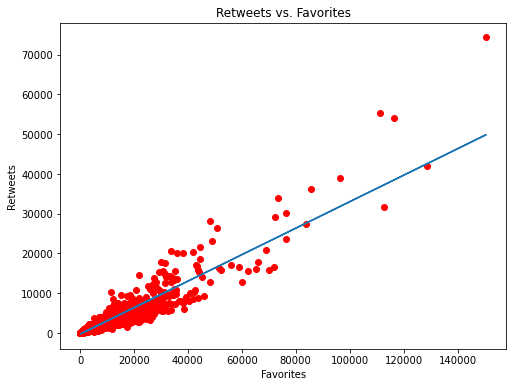

In [69]:
# Scatter plot of favorite_count vs retweet_count
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(df_clean['favorite_count'], df_clean['retweet_count'], c='red')
plt.plot(df_clean['favorite_count'], regression_line)
ax.set_xlabel('Favorites')
ax.set_ylabel('Retweets')
ax.set_title('Retweets vs. Favorites')
plt.show()